In [3]:
import pandas as pd

red = pd.read_csv('winequality-red.csv')
white = pd.read_csv('winequality-white.csv')


In [4]:
red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
white.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [8]:
print(f"Red wine data shape: {red.shape}")
print(f"White wine data shape: {white.shape}")

Red wine data shape: (1599, 12)
White wine data shape: (4898, 12)


In [16]:
print(f"Null values in red wine data: \n\n{red.isna().sum()}")
print("-------------------------------")
print(f"Null values in white wine data: \n\n{white.isna().sum()}")

Null values in red wine data: 

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64
-------------------------------
Null values in white wine data: 

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64



🍷Red Wine Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB
-----------------------------------------

📊 Summary Statistics:
                       count       m

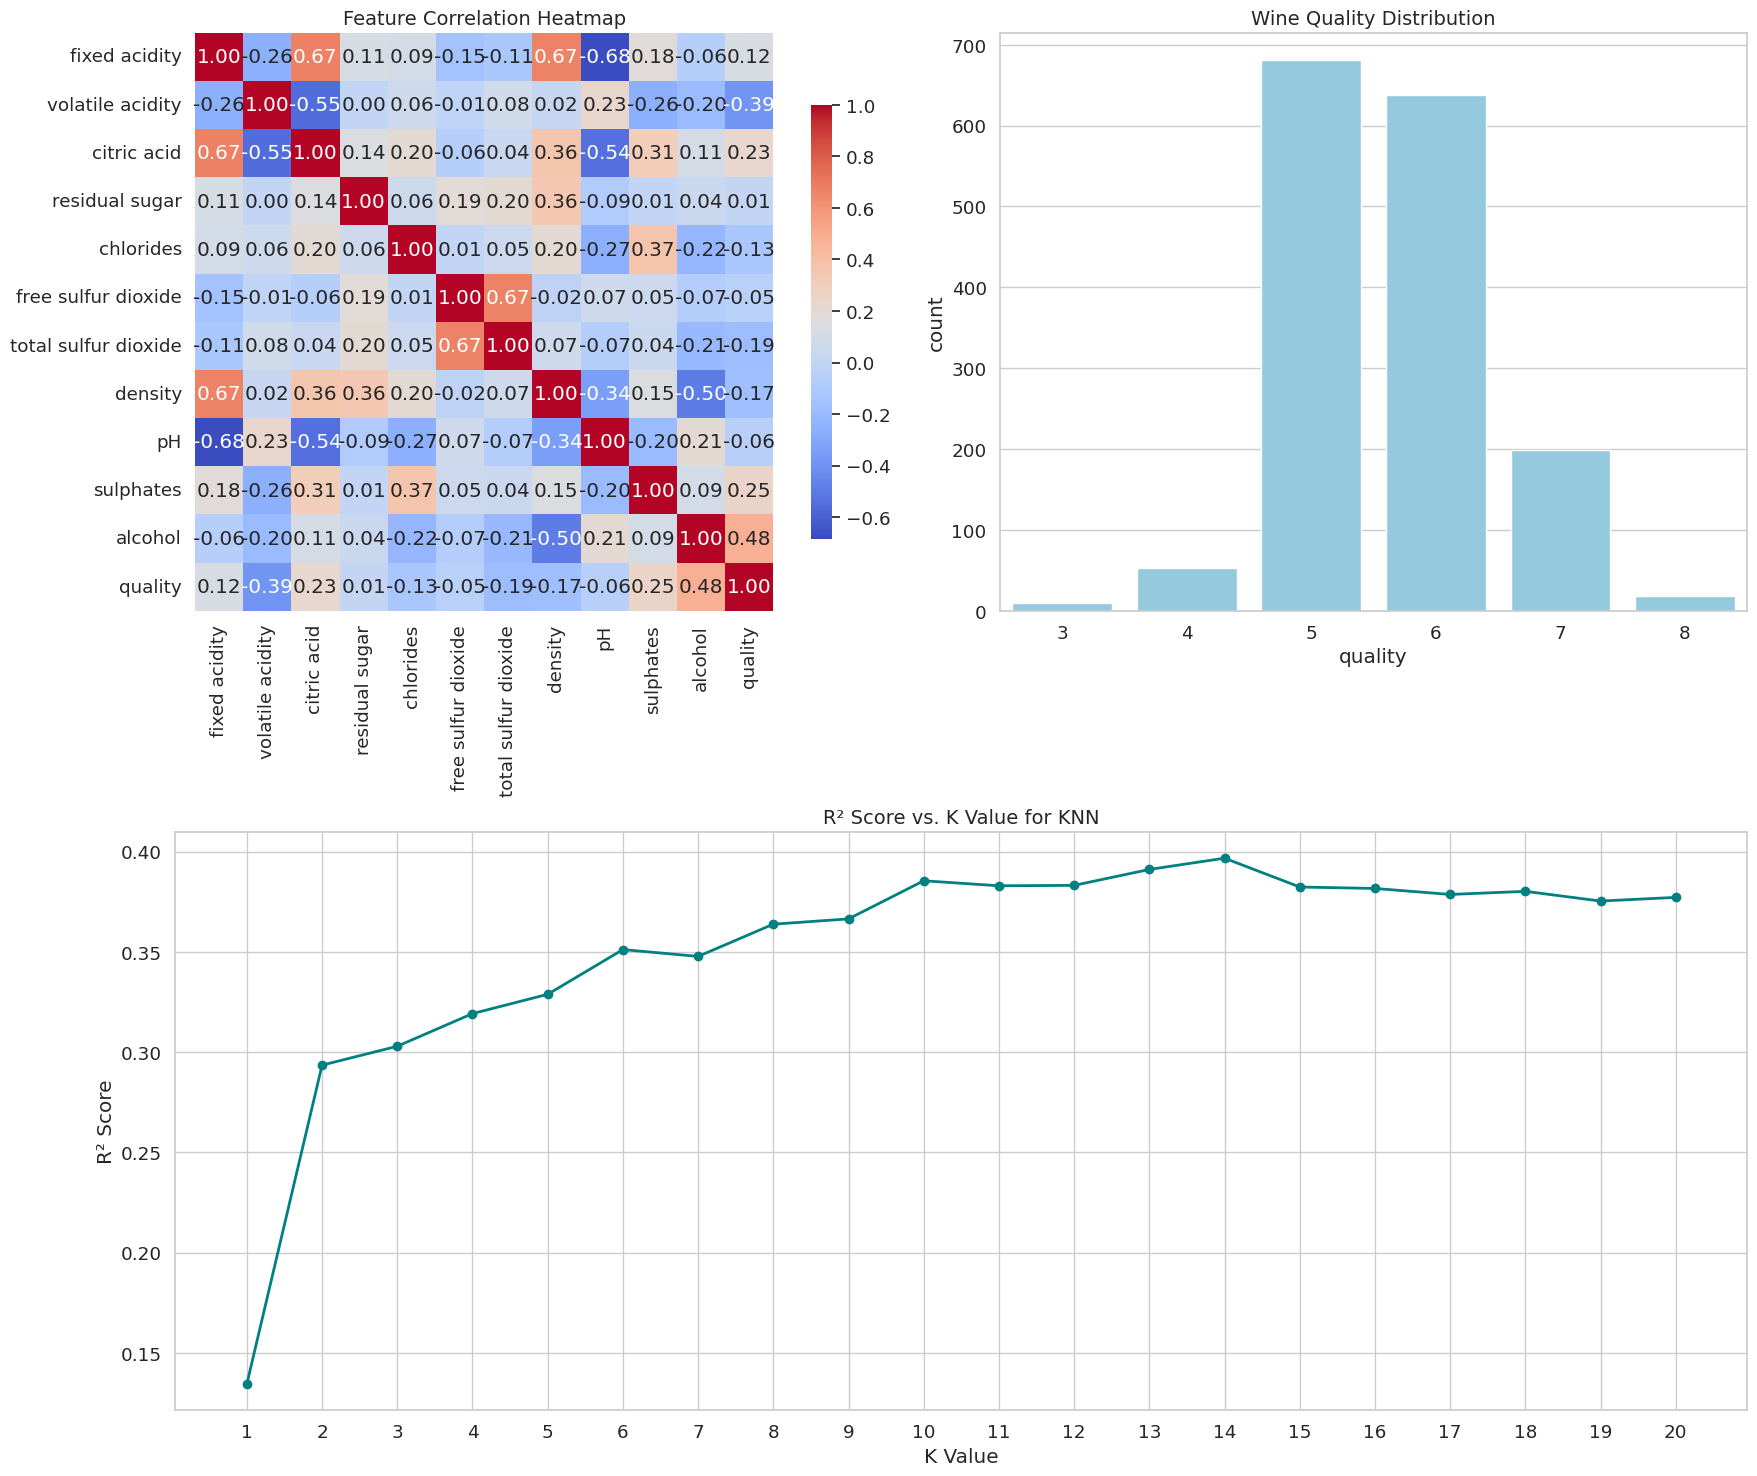

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)

df = pd.read_csv("winequality-red.csv")

print("\n🍷Red Wine Dataset Info:")
df.info()
print("-----------------------------------------")

print("\n📊 Summary Statistics:")
print(df.describe().T)
print("-----------------------------------------")

print("\n🔍 Missing Values Check:")
print(df.isnull().sum())
print("-----------------------------------------")

correlation = df.corr()

X = df.drop("quality", axis=1)
y = df["quality"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

k = 5
knn = KNeighborsRegressor(n_neighbors=k)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"\n🧠 KNN Performance (K={k}):")
print(f"Mean Squared Error: {mse:.4f}")
print(f"R² Score: {r2:.4f}")

print("--------------------------------------------------------------------------------------------------------------------------\n")

r2_scores = []
k_range = range(1, 21)
for k_val in k_range:
    knn = KNeighborsRegressor(n_neighbors=k_val)
    knn.fit(X_train, y_train)
    y_pred_k = knn.predict(X_test)
    r2_scores.append(r2_score(y_test, y_pred_k))

sns.set(style="whitegrid", font_scale=1.2)
plt.figure(figsize=(18, 15))
plt.subplot(2, 2, 1)
sns.heatmap(correlation, annot=True, fmt=".2f", cmap="coolwarm", square=True, cbar_kws={"shrink": 0.75})
plt.title("Feature Correlation Heatmap", fontsize=14)

plt.subplot(2, 2, 2)
sns.countplot(x="quality", data=df, color="skyblue")
plt.title("Wine Quality Distribution", fontsize=14)

plt.subplot(2, 1, 2)
plt.plot(k_range, r2_scores, marker='o', linestyle='-', color='teal', linewidth=2)
plt.title("R² Score vs. K Value for KNN", fontsize=14)
plt.xlabel("K Value")
plt.ylabel("R² Score")
plt.xticks(k_range)
plt.grid(True)

plt.tight_layout()
plt.show()



🍷Red Wine Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB
-----------------------------------------

📊 Summary Statistics:
                       count        

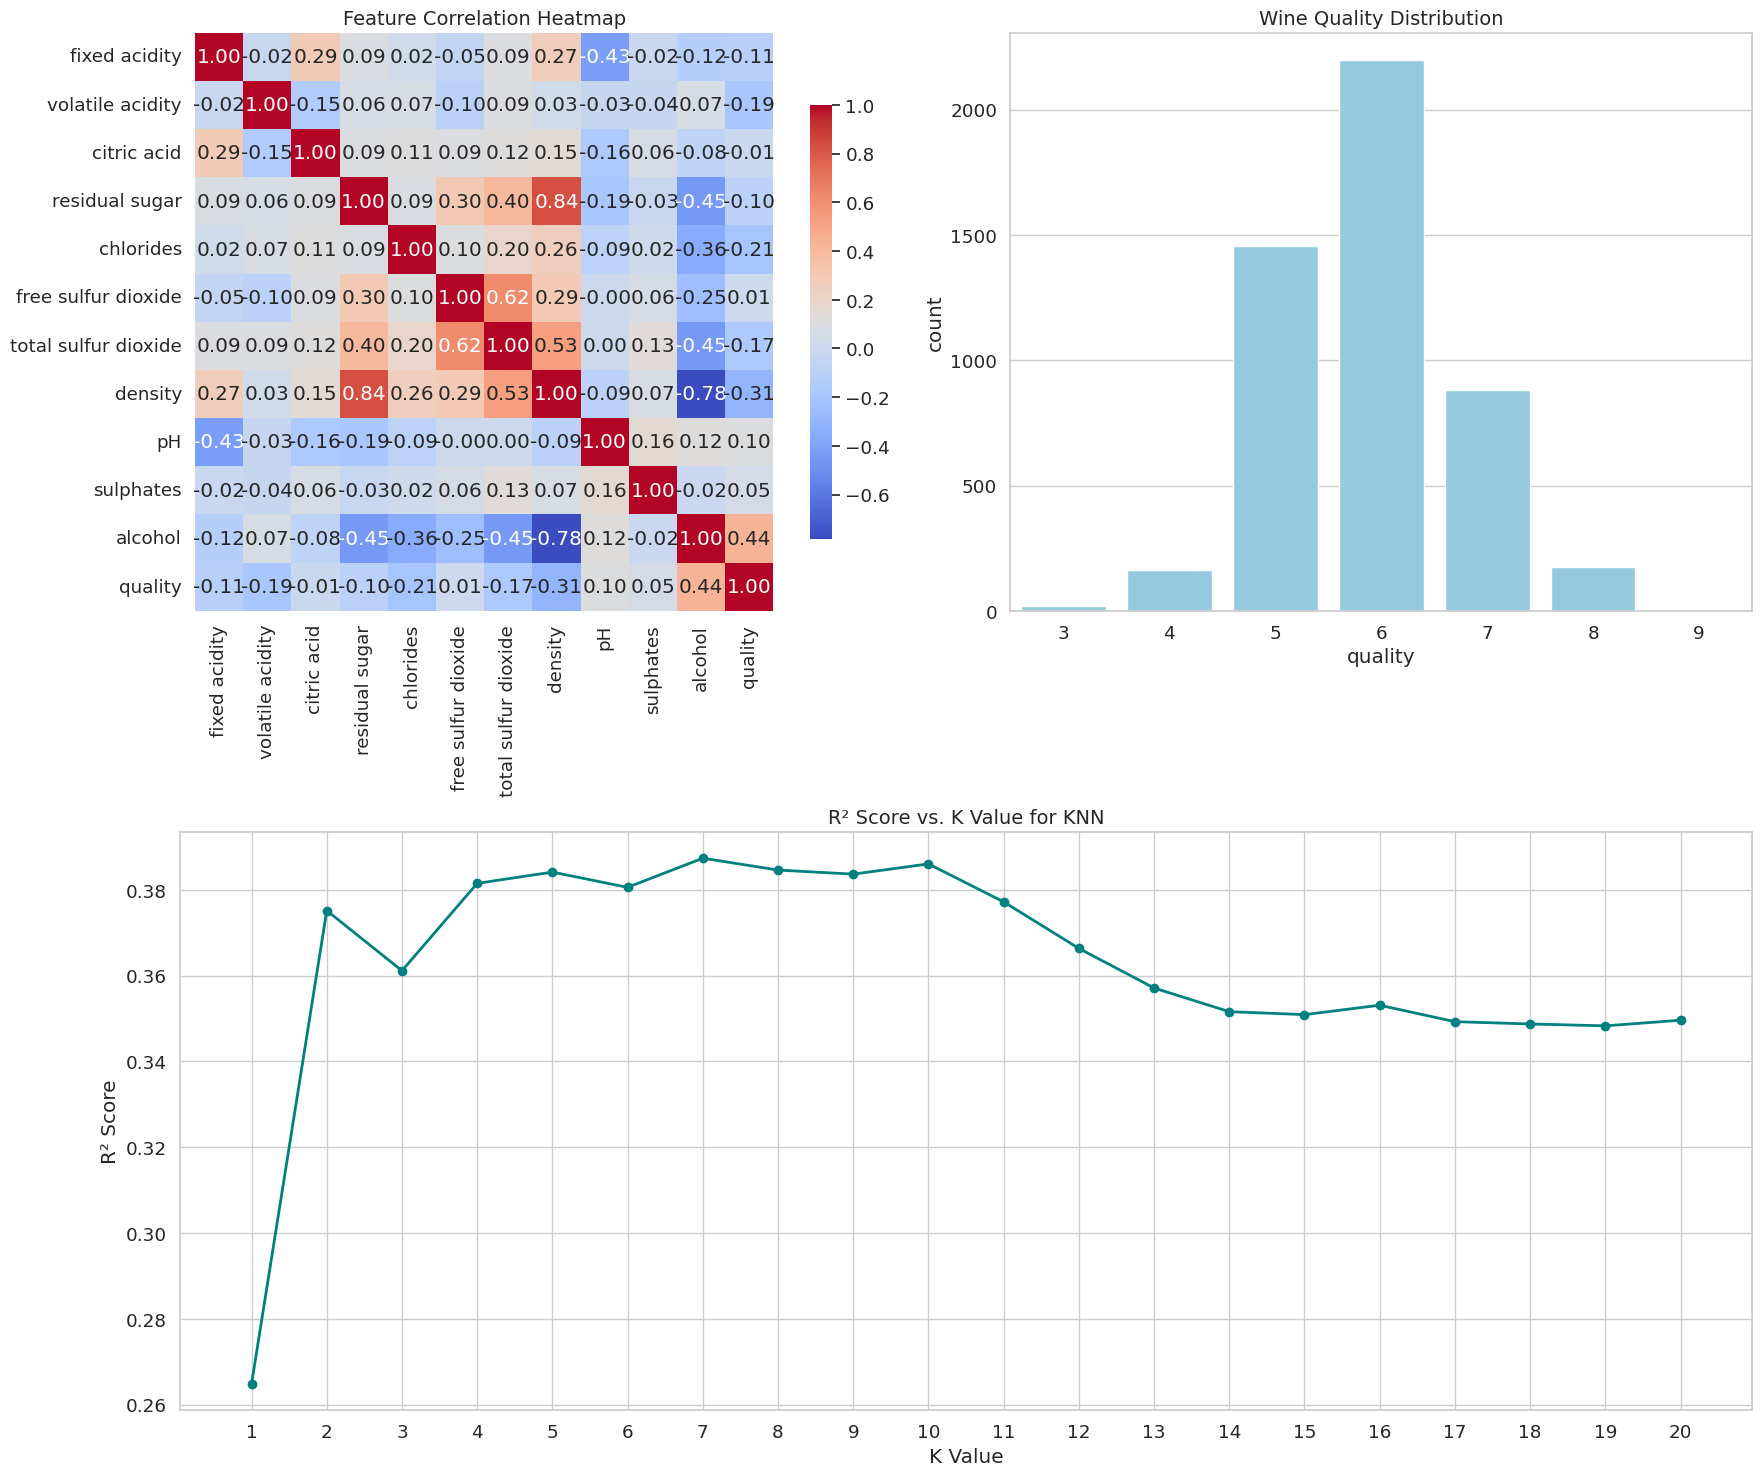

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)

df = pd.read_csv("winequality-white.csv")

print("\n🍷Red Wine Dataset Info:")
df.info()
print("-----------------------------------------")

print("\n📊 Summary Statistics:")
print(df.describe().T)
print("-----------------------------------------")

print("\n🔍 Missing Values Check:")
print(df.isnull().sum())
print("-----------------------------------------")

correlation = df.corr()

X = df.drop("quality", axis=1)
y = df["quality"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

k = 5
knn = KNeighborsRegressor(n_neighbors=k)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"\n🧠 KNN Performance (K={k}):")
print(f"Mean Squared Error: {mse:.4f}")
print(f"R² Score: {r2:.4f}")

print("--------------------------------------------------------------------------------------------------------------------------\n")

r2_scores = []
k_range = range(1, 21)
for k_val in k_range:
    knn = KNeighborsRegressor(n_neighbors=k_val)
    knn.fit(X_train, y_train)
    y_pred_k = knn.predict(X_test)
    r2_scores.append(r2_score(y_test, y_pred_k))

sns.set(style="whitegrid", font_scale=1.2)
plt.figure(figsize=(18, 15))
plt.subplot(2, 2, 1)
sns.heatmap(correlation, annot=True, fmt=".2f", cmap="coolwarm", square=True, cbar_kws={"shrink": 0.75})
plt.title("Feature Correlation Heatmap", fontsize=14)

plt.subplot(2, 2, 2)
sns.countplot(x="quality", data=df, color="skyblue")
plt.title("Wine Quality Distribution", fontsize=14)

plt.subplot(2, 1, 2)
plt.plot(k_range, r2_scores, marker='o', linestyle='-', color='teal', linewidth=2)
plt.title("R² Score vs. K Value for KNN", fontsize=14)
plt.xlabel("K Value")
plt.ylabel("R² Score")
plt.xticks(k_range)
plt.grid(True)

plt.tight_layout()
plt.show()
